In [1]:
%matplotlib 
%load_ext autoreload
%autoreload 2

Using matplotlib backend: Qt4Agg


In [2]:
import sys
sys.path.append('/mnt/Data/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import scipy.signal as scsig
import spectrum as sp
import signale
import cPickle as pkl
import time
import statsmodels.api as sm
import colormaps as cm
import seaborn as sns

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/chenani/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/chenani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def whitenARMA(sig,AR=2,MA=0):
        arma = sm.tsa.ARMA(sig, (AR,MA)).fit(disp=0)
        print 'ARMA parameters calculated for order(%s,%s)' %(AR,MA)
        return arma.resid
def MA(array,ord=2):
    ma = np.array([array[ii-ord/2:ii+ord/2].mean() for ii in range(array.size) if ii >= ord ],dtype=float)
    ma = np.insert(ma,0,array[0:ord/2])
    ma = np.append(ma,array[-(ord/2)-1:-1])
    return ma
def zScore(array):
    return(array - np.average(array))/ np.std(array)

In [5]:
cscPath = '/mnt/Data/ephysdata/Gerbils/G5/CSC1.ncs'
lfpPath =  '/home/chenani/dataWork/ali/Gerbils/gerbil5/2011-08-05/sleep2/CSC1.lfp'
trajPath =  '/home/chenani/dataWork/ali/Gerbils/gerbil6/CA1/2011-09-23/begin1/VT1.nvt'

In [6]:
lfp = pkl.load(open(lfpPath,'rb'))
lfp.theta_delta_ratio(whiten=True)
lfp.REM_detector(peakTresh=3)

In [7]:
Pxx, freqs, t = lfp.spectrogram(minFreq=.1,maxFreq=20,overlap=1024,windowSize=2048,whiten=True)
colPeaks = []
scndPeak = []
trdPeak = []
BandAvg = []
for col in range(Pxx.shape[1]):
    Pxx[:,col] = np.convolve(Pxx[:,col],scsig.gaussian(10,3),'same')
    BandAvg.append(np.array([np.average(Pxx[:,col][0:15]),np.average(Pxx[:,col][16:31]),np.average(Pxx[:,col][32:])]))
for row in range(Pxx.shape[0]):
    Pxx[row,:] = np.convolve(Pxx[row,:],scsig.gaussian(20,10),'same')
Pxx = np.clip(Pxx,0,Pxx.mean()+3*Pxx.std())
fig,ax = pl.subplots(1,1,figsize=[20,10])
im = ax.pcolormesh(t,freqs,Pxx,cmap=cm.viridis)
ax.axhline(5,c='w',lw=0.5)
ax.set_xlim(0,t[0,-1])
ax.plot(lfp.th_del_ratio[0],lfp.th_del_ratio[1],lw=0.5,c='w')
#ax.plot(t[0,:],fstPeak,lw=0.5,c='r')
#ax.plot(t[0,:],scndPeak,lw=0.5,c='g')
#ax.scatter(t[0,:],fstPeak,c='w',s=2)
ax.axhline(lfp.th_del_ratio[1].mean()+lfp.th_del_ratio[1].std(),lw=0.5,c='r')
Draw = np.array(BandAvg)[:,0]
Traw = np.array(BandAvg)[:,1]
Graw = np.array(BandAvg)[:,2]
Dz = (Draw - Draw.mean())/Draw.std()
Tz = (Traw - Traw.mean())/Traw.std()
Gz = (Graw - Graw.mean())/Graw.std()
ax.plot(t[0,:],zScore(np.convolve(Dz,scsig.gaussian(20,10),'same'))-zScore(np.convolve(Tz,scsig.gaussian(20,10),'same')),'b')
ax.axhspan(-1,1,alpha=0.1,color='r')

In [278]:
fig = pl.figure()
ax = fig.gca(projection='3d')
for item in colPeaks:
    if item[0] <9 and item[0] > 4.01 and item.size>2:
        ax.scatter(item[0]- np.random.rand(1),item[1]- np.random.rand(1),item[2]- np.random.rand(1),c='r')
    if item[0] <5 and item.size>2:    
        ax.scatter(item[0]- np.random.rand(1),item[1]- np.random.rand(1),item[2]- np.random.rand(1),c='g')
ax.set_xlabel('First')
ax.set_ylabel('2nd')
ax.set_zlabel('3rd')

In [272]:
for item in colPeaks:
    if item.size ==3:
        pl.scatter(item[0]- np.random.rand(1),item[1] + np.random.rand(1),c='r',alpha=0.5)
    if item.size ==2:
        pl.scatter(item[0]- np.random.rand(1),item[1]+ np.random.rand(1),c='g',alpha=0.5)
    if item.size ==5:
        pl.scatter(item[0]- np.random.rand(1),item[1]+ np.random.rand(1),c='m',alpha=0.5)
    if item.size ==4:
        pl.scatter(item[0]- np.random.rand(1),item[1]+ np.random.rand(1),c='k',alpha=0.5)

In [275]:
from mpl_toolkits.mplot3d import Axes3D
fig = pl.figure()
ax = fig.gca(projection='3d')
#ax.plot_surface(t,freqs,Pxx, cstride=1, cmap=mpl.cm.coolwarm,
#                       linewidth=0, antialiased=False)
ax.scatter(fstPeak+np.random.rand(len(fstPeak)),scndPeak+np.random.rand(len(fstPeak)),trdPeak+np.random.rand(len(fstPeak)))

In [246]:
for iii,item in enumerate(fstPeak):
    if item < 5:
        pl.axvspan(t[0,iii],t[0,iii]+500,alpha=0.5,color='g')
    elif item <10:
        if not np.isnan(scndPeak[iii]):
            if scndPeak[iii] < 5:
                pl.axvspan(t[0,iii],t[0,iii]+500,alpha=0.5,color='g')
            else:
                pl.axvspan(t[0,iii],t[0,iii]+500,alpha=0.5,color='r')
    elif not np.isnan(scndPeak[iii]):
        if scndPeak[iii] < 5:
            pl.axvspan(t[0,iii],t[0,iii]+500,alpha=0.5,color='g')
        elif scndPeak[iii] < 10:
            pl.axvspan(t[0,iii],t[0,iii]+500,alpha=0.5,color='r')
        else:
            pl.axvspan(t[0,iii],t[0,iii]+500,alpha=0.5,color='k')
    else:
        pl.axvspan(t[0,iii],t[0,iii]+500,alpha=0.5,color='k')
pl.plot(t[0,:],fstPeak,'w')

In [28]:

sns.kdeplot(lfp.th_del_ratio[1]);
pl.yscale('log')
pl.xscale('log')
pl.axvline(lfp.th_del_ratio[1].mean())

In [355]:
f,ax = pl.subplots(2,3,figsize=[20,10])
wt=[]
l = lfp.signal.size
dsig = scsig.decimate(lfp.signal[sigSlice],2)
for iii in range(1,4):
    t0 = time.time()
    arma = sm.tsa.ARMA(dsig,(iii,0)).fit(disp=0)
    t1 = time.time()
    p = sp.Periodogram(dsig,sampling=1000,NFFT=2**15)
    p();
    residPSD = sp.Periodogram(arma.resid,sampling=1000,NFFT=2**15)
    residPSD()
    t2 = time.time()
    ##########################################################################
    Nfreqz = p.psd.size
    smoothingKernel = scsig.gaussian(Nfreqz/200,Nfreqz/400)
    psdSmooth = np.convolve(p.psd,smoothingKernel,'same')
    residPSDSmooth = np.convolve(residPSD.psd,smoothingKernel,'same')
    psdSmooth = (psdSmooth)/psdSmooth.std()
    residPSDSmooth = (residPSDSmooth)/residPSDSmooth.std()
    ###########################################################################
    ax[(iii-1)/3,np.mod((iii-1),3)].set_yscale('log')
    ax[(iii-1)/3,np.mod((iii-1),3)].plot(p.frequencies(),psdSmooth,lw=0.7)
    ax[(iii-1)/3,np.mod((iii-1),3)].plot(residPSD.frequencies(),residPSDSmooth,lw=0.7)
    t3 = time.time()
    wt.append(t1-t0)
    print "for AR(%s): \n time for whitening: %s \n time for PSD estimation: %s \n time for plotting %s" %(iii,t1-t0,t2-t1,t3-t2)

for AR(1): 
 time for whitening: 0.532609939575 
 time for PSD estimation: 0.0906322002411 
 time for plotting 0.0471589565277
for AR(2): 
 time for whitening: 2.25619912148 
 time for PSD estimation: 0.0939049720764 
 time for plotting 0.0614938735962
for AR(3): 
 time for whitening: 5.60937690735 
 time for PSD estimation: 0.0667719841003 
 time for plotting 0.0589051246643


In [334]:
Draw = np.array(BandAvg)[:,0]
Traw = np.array(BandAvg)[:,1]
Graw = np.array(BandAvg)[:,2]
Dz = (Draw - Draw.mean())/Draw.std()
Tz = (Traw Tz = (Traw - Traw.mean())/Traw.std()
- Traw.mean())/Traw.std()
Gz = (Graw - Graw.mean())/Graw.std()
pl.plot(t[0,:],zScore(np.convolve(Dz,scsig.gaussian(20,10),'same'))-zScore(np.convolve(Tz,scsig.gaussian(20,10),'same')),'b')
pl.axhspan(-1,1,alpha=0.1,color='r')
#pl.axhline(15)
#pl.plot(t[0,:],zScore(np.convolve(Tz,scsig.gaussian(10,5),'same'))+15,'r')
#pl.plot(t[0,:],zScore(np.convolve(Gz,scsig.gaussian(10,5),'same'))+15,'g')
pl.pcolormesh(t,freqs,Pxx)

In [29]:
l = lfp.signal.size
ss = sp.Periodogram(lfp.signal[l/2:l/2+2**18],sampling=2000)
ss();
pl.yscale('log')
smoothingKernel = scsig.gaussian(ss.psd.size/100,ss.psd.size/200)
psdSmooth = np.convolve(ss.psd,smoothingKernel,'same')
pl.plot(ss.frequencies(),psdSmooth)

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

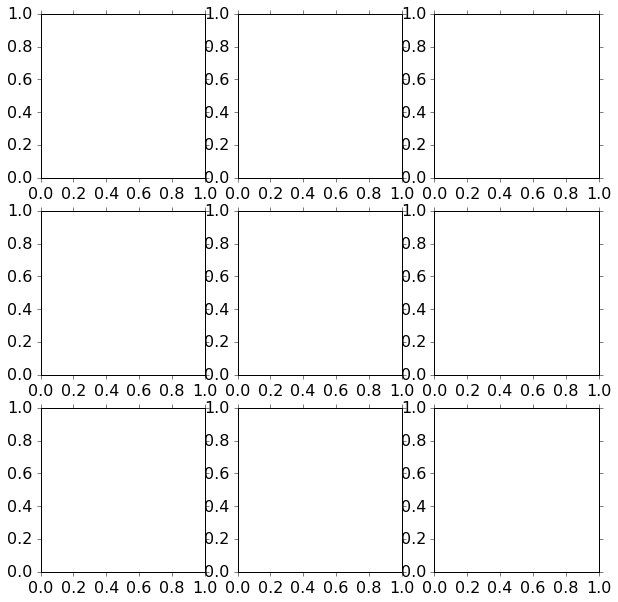

In [7]:
f,ax = pl.subplots(3,3,figsize=[10,10])
wt=[]
for iii in range(1,10):
    t0 = time.time()
    lfp.whitenARMA(AR=1,MA=iii)
    t1 = time.time()
    dsig = scsig.decimate(lfp.signal_white,2)
    p = sp.Periodogram(dsig,sampling=1000)
    p();
    t2 = time.time()
    Nfreqz = p.psd.size
    smoothingKernel = scsig.gaussian(Nfreqz/100,Nfreqz/200)
    psdSmooth = np.convolve(p.psd,smoothingKernel,'same')
    ax[(iii-1)/3,np.mod((iii-1),3)].plot(p.frequencies(),psdSmooth)
    t3 = time.time()
    wt.append(t1-t0)
    print "for AR(%s): \n time for whitening: %s \n time for PSD estimation: %s \n time for plotting %s" %(iii,t1-t0,t2-t1,t3-t2)

In [ ]:
f,ax = pl.subplots(3,3,figsize=[10,10])
wt=[]
for iii in range(1,10):
    t0 = time.time()
    lfp.whitenARMA(AR=2,MA=iii)
    t1 = time.time()
    dsig = scsig.decimate(lfp.signal_white,2)
    p = sp.Periodogram(dsig,sampling=1000)
    p();
    t2 = time.time()
    Nfreqz = p.psd.size
    smoothingKernel = scsig.gaussian(Nfreqz/100,Nfreqz/200)
    psdSmooth = np.convolve(p.psd,smoothingKernel,'same')
    ax[(iii-1)/3,np.mod((iii-1),3)].plot(p.frequencies(),psdSmooth)
    t3 = time.time()
    wt.append(t1-t0)
    print "for AR(%s): \n time for whitening: %s \n time for PSD estimation: %s \n time for plotting %s" %(iii,t1-t0,t2-t1,t3-t2)

In [ ]:
ss = pd.Series(np.sin(range(200))+0.1*np.random.rand(200))
test =sm.tsa.ARMA(ss.values, (3,0)).fit()

In [61]:
lfp.spectrogram(maxFreq=20,display=True);

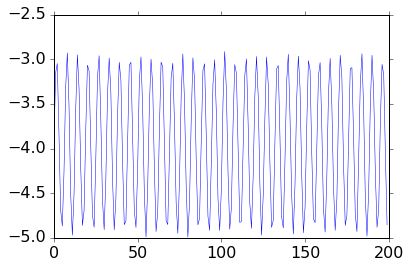

In [44]:
#pl.plot(test.df_model.real,lw=0.5)
pl.plot(ss-test.df_model.real,lw=0.5)

In [354]:
sigSlice = np.logical_and(lfp.time_axis()>100,lfp.time_axis()<100000)


In [342]:
pl.plot(lfp.signal[sigSlice])

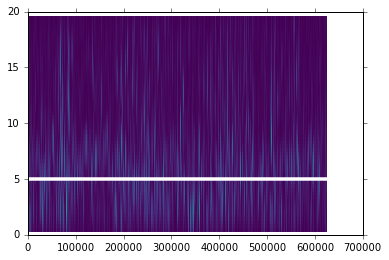

In [47]:
%psource signale.NeuralynxCSC.REM_detector

In [252]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

In [259]:
R = np.sqrt(t**2+freqs**2)

In [263]:
fig = pl.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(t,freqs,Pxx)

In [8]:

def nvt_loader(filename):
    """ 
    Memory map the Neuralynx .nvt format
    Fields
    -------
    swstx
    swid
    sw_data_size
    qTimeStamps       Cheetah timestamp for this record. This value is in microseconds.
    dwpoints          Points with the color bitfield values for this record.This is a 400
                      element array.  See Video Tracker in reference. 
    sncrc
    dnextracted_x     Extracted X location of the target being tracked. 
    dnextracted_y     Extracted Y location of the target being tracked.
    dnextracted_angle The calculated head angle in degrees clockwise from the positive Y
                      axis. Zero will be assigned if angle tracking is disabled.
    dnTargets         Colored targets using the samebitfield format used by the dwPoints array.
                      Instead of transitions, the bitfield indicates the colors that make up 
                      each particular target and the center point of that target.  This is a 50
                      element array sorted by size from largest (index 0) to smallest(index 49).
                      A target value of 0 means that no target is present in thatindex location.
                      See Video Tracker Bitfield Information in reference. 
    
    Reference:
    ----------
        http://neuralynx.com/software/NeuralynxDataFileFormats.pdf
    """ 
    nev_dtype = np.dtype([
        ('swstx'              , '<i2'),
        ('swid'               , '<i2'),
        ('sw_data_size'       , '<i2'),
        ('qTimeStamps'        , '<u8'),
        ('dwPoints'           , '<u4',(400,)),
        ('sncrc'              , '<i2'),
        ('dnextracted_x'      , '<i4'),
        ('dnextracted_y'      , '<i4'),
        ('dnextracted_angle'  , '<i4'),
        ('dnTargets'          , '<i4',(50,)),
    ])
    return np.memmap(filename, dtype=nev_dtype, mode='readwrite',
       offset=(16 * 2**10))

In [47]:
tt = np.array(nvt_loader(trajPath)['qTimeStamps'])
xx = np.array(nvt_loader(trajPath)['dnextracted_x'])
yy = np.array(nvt_loader(trajPath)['dnextracted_y'])

In [46]:
trajPath = '/home/chenani/dataWork/ali/Gerbils/gerbil5/2011-08-14/sleep3/VT1.nvt'

In [48]:
pl.plot(tt,xx)